# Homoegeneidad

In [482]:
import numpy as np
import pandas as pd
from scipy.stats import f, t
import matplotlib.pyplot as plt
from funciones_qq_pp_plot import*
from funcioneschicuadrado_continuas import*
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import statsmodels.api as sm


In [483]:
df = pd.read_excel("TiemposArribos.xlsx")

In [484]:
df = df.drop(0)

In [485]:
df.keys()
df_FH1 = df['Tiempos Entre Arribos Franja Horaria 1 (seg)']
df_FH2 = df['Tiempos Entre Arribos Franja Horaria 2 (seg)']
df_FH3 = df['Tiempos Entre Arribos Franja Horaria 3 (seg)']
df_FH4 = df['Tiempos Entre Arribos Franja Horaria 4 (seg)']

In [486]:
#df_FH1 = df_FH1.dropna()
#df_FH2 = df_FH2.dropna()
#df_FH3 = df_FH3.dropna()
#df_FH4 = df_FH4.dropna()
alpha = 0.05

In [487]:
#Se crea la función que realiza la prueba de razón de varianzas para dos series x y y, bajo una significancia alpha
def razonVarianzas (x,y,alpha):
    # Calcula la varianza muestral de cada set de datos
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    # Calcula la razón de las varianzas
    f_ratio = var_x / var_y

    # Define los grados de libertad para la prueba F
    df_x = len(x) - 1
    df_y = len(y) - 1

    # Calcula el valor del estadístico F para un nivel de significancia alpha
    f_statistic1 = f.ppf(q = alpha/2, dfn = df_y, dfd = df_x)
    f_statistic2 = f.ppf(q = 1-alpha/2, dfn = df_y, dfd = df_x)

    #Calcula el intervalo de confianza para la prueba de razón de varianzas
    IC_inf = f_ratio * f_statistic1
    IC_sup = f_ratio * f_statistic2

    print("IC razón varianzas: [", IC_inf, " , " , IC_sup, "]")

IC razón varianzas: [ 2.928471092989194  ,  7.7514885038435875 ]
None


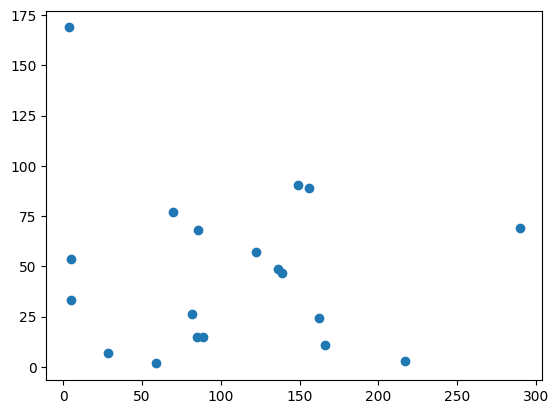

In [488]:
#De 1 a 2

plt.scatter(df_FH1, df_FH2, label='Datos de dispersión')
print (razonVarianzas(df_FH1, df_FH2,alpha))

IC razón varianzas: [ 1.0705627657333603  ,  2.833715856404309 ]
None


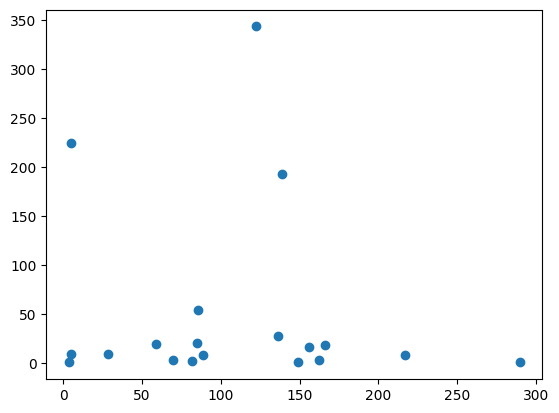

In [489]:
#De 1 a 3
plt.scatter(df_FH1, df_FH3, label='Datos de dispersión')
print (razonVarianzas(df_FH1, df_FH3,alpha))

IC razón varianzas: [ 2.3679149290461408  ,  6.267729736012283 ]
None


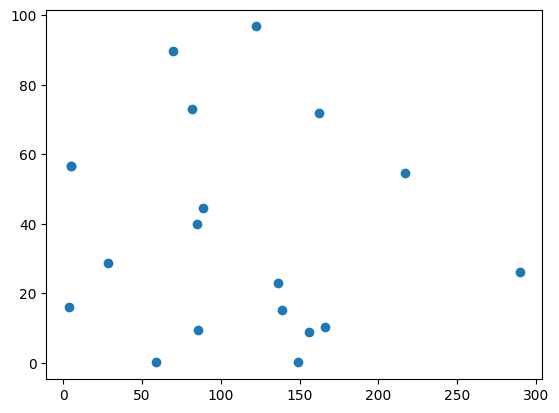

In [490]:
#De 1 a 4
plt.scatter(df_FH1, df_FH4, label='Datos de dispersión')
print (razonVarianzas(df_FH1, df_FH4,alpha))

IC razón varianzas: [ 0.22469794996607548  ,  0.5947620859802978 ]
None


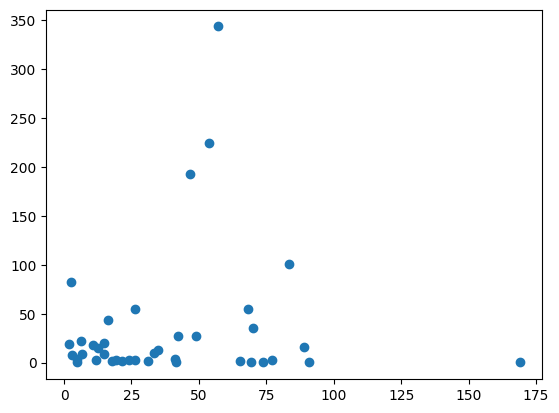

In [491]:
# De 2 a 3

plt.scatter(df_FH2, df_FH3, label='Datos de dispersión')
print (razonVarianzas(df_FH2, df_FH3,alpha))

IC razón varianzas: [ 0.496996203567995  ,  1.3155193396424747 ]
None


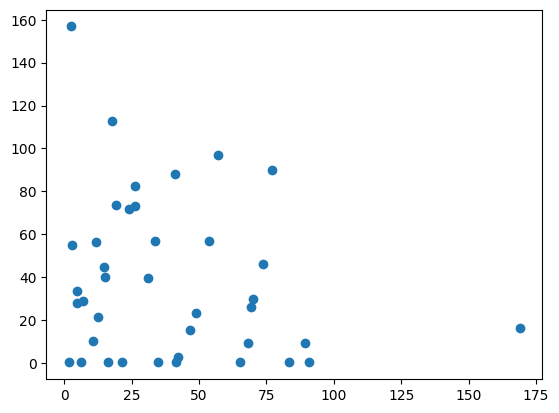

In [492]:
# De 2 a 4 Lo cumple

plt.scatter(df_FH2, df_FH4, label='Datos de dispersión')
print (razonVarianzas(df_FH2, df_FH4,alpha))

IC razón varianzas: [ 1.3595083465071167  ,  3.5985375932369514 ]
None


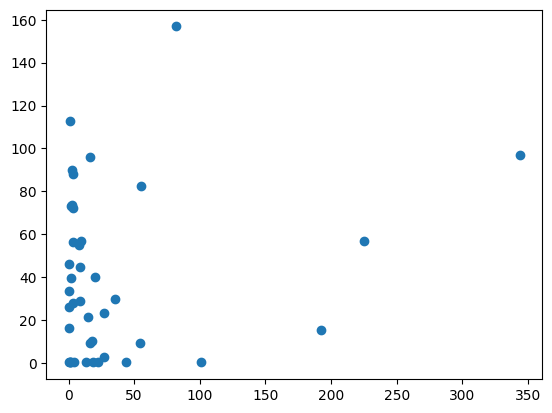

In [493]:
# De 3 a 4

plt.scatter(df_FH3, df_FH4, label='Datos de dispersión')
print (razonVarianzas(df_FH3, df_FH4,alpha))

# Diferencia de medias para varianzas iguales

### Lo cumplen: Franja Horaria de 2 seg y Franja Horaria de 4 seg

In [494]:
#Se crea la función que realiza la prueba de diferencia de medias para dos series x y y, bajo una significancia alpha y el supuesto de que las varianzas son estadísticamente iguales
def diffMediasVarIguales (x,y,alpha):
    # Cálculo de la media y la varianza muestral de cada set de datos
    n_x = len(x)
    n_y = len(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    #Cálculo del Sp^2
    Sp_2 = (((n_x - 1) * var_x) + ((n_y - 1) * var_y)) / (n_x + n_y - 2)
    Sp = np.sqrt(Sp_2)

    # Cálculo del intervalo de confianza
    diff_means = mean_x - mean_y #Diferencia de medias muestrales
    v = n_x + n_y - 2  # grados de libertad del estadístico t
    t_statistic = t.ppf(1 - alpha/2, v)  # valor del estadístico t

    std_error = Sp * np.sqrt(1/n_x + 1/n_y) #standar error
    confidence_interval = diff_means + np.array([-1, 1]) * t_statistic * std_error

    # Resultados
    print("Intervalo de confianza para la diferencia de medias: ", confidence_interval)

In [495]:
diffMediasVarIguales(df_FH2, df_FH4,alpha)

Intervalo de confianza para la diferencia de medias:  [-11.93681308  12.93958982]


Como tambien lo cumple la diferencia de medias se procede a realizar una prueba de bondad de ajuste y se juntan ambos datasets

In [496]:
df_grouped = pd.concat([df_FH2, df_FH4], ignore_index=True)
df_grouped

0      33.53
1      69.33
2      53.82
3      26.40
4      46.61
       ...  
129      NaN
130      NaN
131      NaN
132      NaN
133      NaN
Length: 134, dtype: float64

In [497]:
df_grouped.dropna(inplace=True)
df_grouped

0      33.53
1      69.33
2      53.82
3      26.40
4      46.61
       ...  
103     0.35
104     0.54
105    39.35
106    95.86
107     0.13
Length: 80, dtype: float64

In [498]:
df_grouped = pd.DataFrame(df_grouped)

In [499]:

df_grouped = df_grouped.rename(columns={0:"Data"})

In [500]:
df_grouped= df_grouped.reset_index(drop=True)
df_grouped

,Data
0,33.53
1,69.33
2,53.82
3,26.40
4,46.61
...,...
75,0.35
76,0.54
77,39.35
78,95.86


# Autocorrelacion Modelos sin Homogeneidad

# FH1

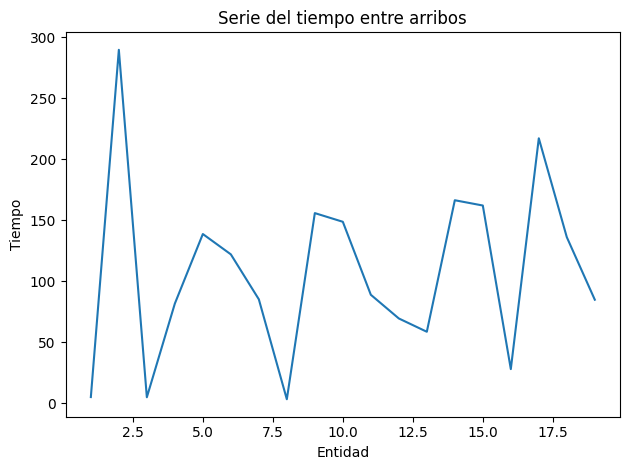

In [501]:
# Crea el plot de la serie temporal
plt.plot(np.arange(1,len(df_FH1)+1), df_FH1)
# Agrega una etiqueta para el eje x
plt.xlabel('Entidad')
# Agrega una etiqueta para el eje y
plt.ylabel('Tiempo')
# Agrega un título para el plot
plt.title('Serie del tiempo entre arribos')
# Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
plt.tight_layout()
# Muestra el plot
plt.show()

In [502]:
df_FH1= df_FH1.reset_index(drop=True)
df_FH1.dropna(inplace=True)
df_FH1

media = df_FH1.mean().item()
media
errorData = np.zeros(len(df_FH1))


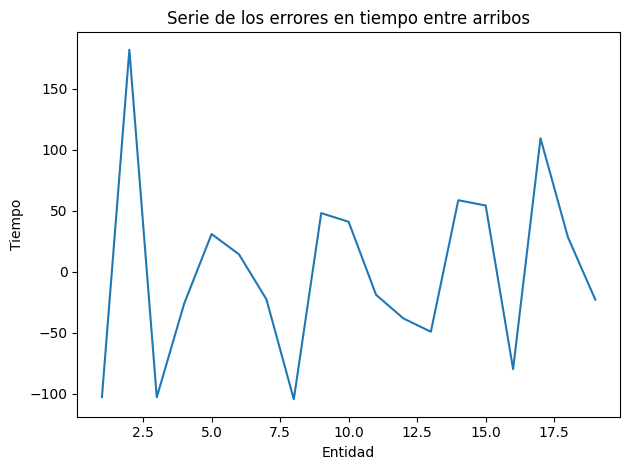

In [503]:

a = []
errorData =[]

for i in range(0 , len(df_FH1)):
  a.append(float(df_FH1[i]))

for i in range(0 , len(a)):
  resultados = a[i]-media
  errorData.append(resultados)


# Crea el plot de la serie temporal
plt.plot(np.arange(1,len(df_FH1)+1), errorData)
# Agrega una etiqueta para el eje x
plt.xlabel('Entidad')
# Agrega una etiqueta para el eje y
plt.ylabel('Tiempo')
# Agrega un título para el plot
plt.title('Serie de los errores en tiempo entre arribos')
# Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
plt.tight_layout()
# Muestra el plot
plt.show()


In [504]:
lags = 10
results = sm.stats.acorr_ljungbox(df_FH1, lags=[lags])
print("Número de lags a evaluar: ", lags)
print("Ljung-Box statistic: ", results['lb_stat'][lags])
print("Ljung-Box p-value: ", results['lb_pvalue'][lags])

Número de lags a evaluar:  10
Ljung-Box statistic:  10.562204151278664
Ljung-Box p-value:  0.3926267048296586


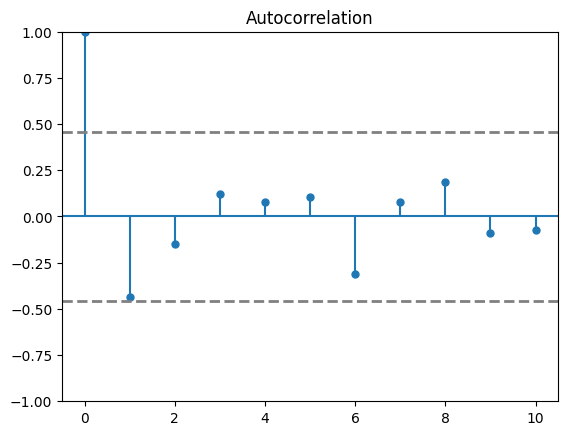

array([ 1.        , -0.43790847, -0.14995866,  0.1236978 ,  0.07930355,
        0.10358253, -0.30986843,  0.07720744,  0.18408922, -0.08874205,
       -0.07362349])

In [505]:

plot_acf(df_FH1, lags = 10, alpha = None)
plt.axhline(y=-2 / np.sqrt(len(df_FH1)), color='gray', lw=2, linestyle='--')
plt.axhline(y=2 / np.sqrt(len(df_FH1)), color='gray', lw=2, linestyle='--')
plt.show()
acf(df_FH1,nlags=10)

## Correccion autocorrelacion AR(1)

In [506]:
lags = 1
results = sm.stats.acorr_ljungbox(df_FH1, lags=[lags])
print("Número de lags a evaluar: ", lags)
print("Ljung-Box statistic: ", results['lb_stat'][lags])
print("Ljung-Box p-value: ", results['lb_pvalue'][lags])

Número de lags a evaluar:  1
Ljung-Box statistic:  4.25076477910766
Ljung-Box p-value:  0.0392326589733983


In [507]:
df_FH1 = pd.DataFrame(df_FH1)
df_FH1

,Tiempos Entre Arribos Franja Horaria 1 (seg)
0,5.20
1,289.54
2,5.02
3,81.73
4,138.70
5,122.05
6,85.24
7,3.41
8,155.83
9,148.72


In [508]:

# Supongamos que 'df_FH1' es tu DataFrame y 'columna_tiempo' es la columna de la serie temporal
serie_temporal = df_FH1['Tiempos Entre Arribos Franja Horaria 1 (seg)']

# Ajustar un modelo AR(1)
lags = 1  # Especificar el número de rezagos (lags)
modelo_ar = sm.tsa.AutoReg(serie_temporal, lags=lags).fit()

# Imprimir resumen del modelo
print(modelo_ar.summary())

# Obtener y visualizar los coeficientes del modelo
print("Coeficientes del modelo AR(1):")
print("Intercepto:", modelo_ar.params[0])
print("Coeficiente AR(1):", modelo_ar.params[1])

# Predecir la serie utilizando el modelo
serie_predicha = modelo_ar.predict()

# Imprimir la serie predicha
print("Serie Temporal Predicha:")
serie_predicha

                                         AutoReg Model Results                                          
Dep. Variable:     Tiempos Entre Arribos Franja Horaria 1 (seg)   No. Observations:                   19
Model:                                               AutoReg(1)   Log Likelihood                -100.032
Method:                                         Conditional MLE   S.D. of innovations             62.703
Date:                                          Fri, 01 Mar 2024   AIC                            206.065
Time:                                                  14:05:17   BIC                            208.736
Sample:                                                       1   HQIC                           206.433
                                                             19                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

0            NaN
1     159.292754
2      33.732839
3     159.372240
4     125.498352
5     100.341328
6     107.693697
7     123.948393
8     160.083189
9      92.776998
10     95.916659
11    122.305702
12    130.872426
13    135.681273
14     88.127122
15     90.034764
16    149.180487
17     65.725580
18    101.476198
dtype: float64

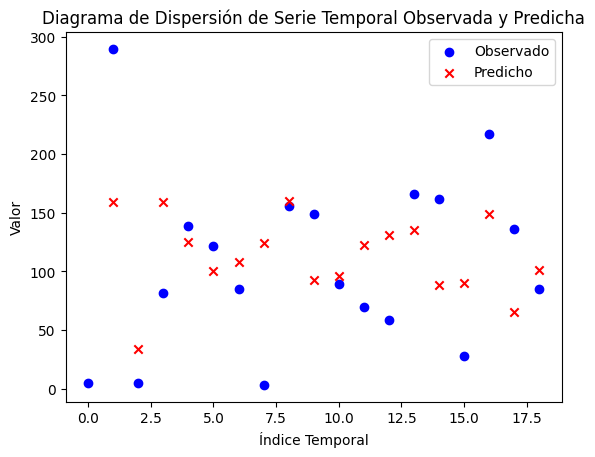

In [509]:
plt.scatter(serie_temporal.index, serie_temporal, label='Observado', color='blue')
plt.scatter(serie_predicha.index, serie_predicha, label='Predicho', color='red', marker='x')

# Configurar el gráfico
plt.title('Diagrama de Dispersión de Serie Temporal Observada y Predicha')
plt.xlabel('Índice Temporal')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [510]:
df_FH1AR1 = pd.DataFrame(serie_predicha)
df_FH1AR1

,0
0,NaN
1,159.292754
2,33.732839
3,159.372240
4,125.498352
5,100.341328
6,107.693697
7,123.948393
8,160.083189
9,92.776998


# FH3

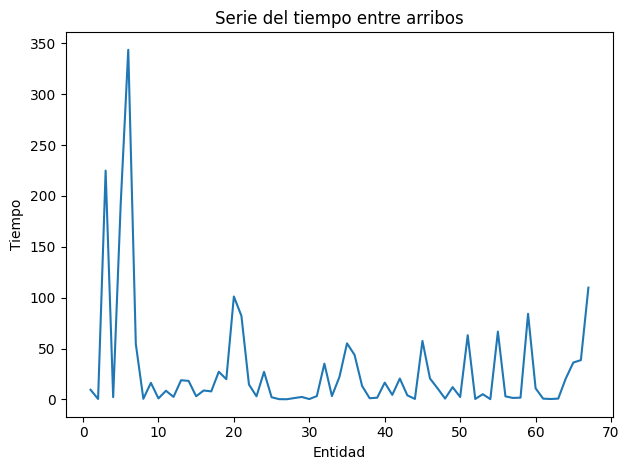

In [511]:
# Crea el plot de la serie temporal
plt.plot(np.arange(1,len(df_FH3)+1), df_FH3)
# Agrega una etiqueta para el eje x
plt.xlabel('Entidad')
# Agrega una etiqueta para el eje y
plt.ylabel('Tiempo')
# Agrega un título para el plot
plt.title('Serie del tiempo entre arribos')
# Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
plt.tight_layout()
# Muestra el plot
plt.show()

In [512]:
df_FH3= df_FH3.reset_index(drop=True)
df_FH3.dropna(inplace=True)
df_FH3

media = df_FH3.mean().item()
media
errorData = np.zeros(len(df_FH3))


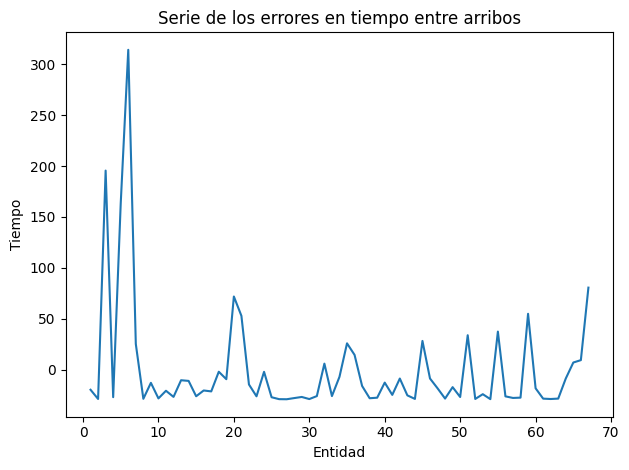

In [513]:

a = []
errorData =[]

for i in range(0 , len(df_FH3)):
  a.append(float(df_FH3[i]))

for i in range(0 , len(a)):
  resultados = a[i]-media
  errorData.append(resultados)


# Crea el plot de la serie temporal
plt.plot(np.arange(1,len(df_FH3)+1), errorData)
# Agrega una etiqueta para el eje x
plt.xlabel('Entidad')
# Agrega una etiqueta para el eje y
plt.ylabel('Tiempo')
# Agrega un título para el plot
plt.title('Serie de los errores en tiempo entre arribos')
# Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
plt.tight_layout()
# Muestra el plot
plt.show()


In [514]:

lags = 10
results = sm.stats.acorr_ljungbox(df_FH3, lags=[lags])
print("Número de lags a evaluar: ", lags)
print("Ljung-Box statistic: ", results['lb_stat'][lags])
print("Ljung-Box p-value: ", results['lb_pvalue'][lags])

Número de lags a evaluar:  10
Ljung-Box statistic:  11.895484421848485
Ljung-Box p-value:  0.29211226000455837


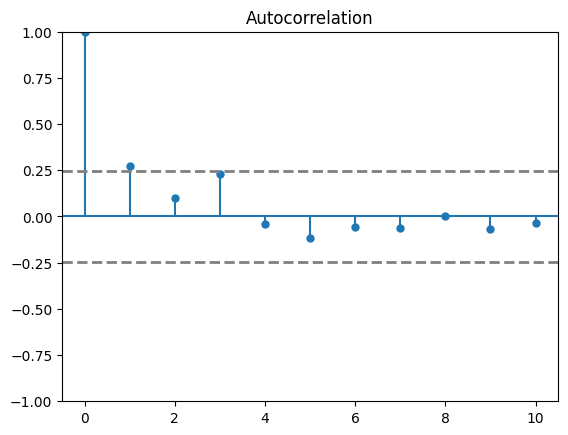

array([ 1.        ,  0.27135445,  0.09888545,  0.23078231, -0.04119489,
       -0.11811521, -0.05504313, -0.06295637,  0.00249937, -0.06956678,
       -0.03667287])

In [515]:


plot_acf(df_FH3, lags = 10, alpha = None)
plt.axhline(y=-2 / np.sqrt(len(df_FH3)), color='gray', lw=2, linestyle='--')
plt.axhline(y=2 / np.sqrt(len(df_FH3)), color='gray', lw=2, linestyle='--')
plt.show()
acf(df_FH3,nlags=10)

## Correccion autocorrelacion 1 y 3

In [516]:
lags = 1
results = sm.stats.acorr_ljungbox(df_FH3, lags=[lags])
print("Número de lags a evaluar: ", lags)
print("Ljung-Box statistic: ", results['lb_stat'][lags])
print("Ljung-Box p-value: ", results['lb_pvalue'][lags])

Número de lags a evaluar:  1
Ljung-Box statistic:  5.157673504502226
Ljung-Box p-value:  0.02314387931572227


In [517]:
df_FH3 = pd.DataFrame(df_FH3)
df_FH3

,Tiempos Entre Arribos Franja Horaria 3 (seg)
0,9.53
1,0.48
2,224.94
3,2.24
4,192.63
...,...
62,0.84
63,20.59
64,36.30
65,38.64


In [518]:

# Supongamos que 'df_FH1' es tu DataFrame y 'columna_tiempo' es la columna de la serie temporal
serie_temporal = df_FH3['Tiempos Entre Arribos Franja Horaria 3 (seg)']

# Ajustar un modelo AR(1)
lags = 1  # Especificar el número de rezagos (lags)
modelo_ar = sm.tsa.AutoReg(serie_temporal, lags=lags).fit()

# Imprimir resumen del modelo
print(modelo_ar.summary())

# Obtener y visualizar los coeficientes del modelo
print("Coeficientes del modelo AR(1):")
print("Intercepto:", modelo_ar.params[0])
print("Coeficiente AR(1):", modelo_ar.params[1])

# Predecir la serie utilizando el modelo
serie_predicha = modelo_ar.predict()

# Imprimir la serie predicha
print("Serie Temporal Predicha:")
serie_predicha

                                         AutoReg Model Results                                          
Dep. Variable:     Tiempos Entre Arribos Franja Horaria 3 (seg)   No. Observations:                   67
Model:                                               AutoReg(1)   Log Likelihood                -357.720
Method:                                         Conditional MLE   S.D. of innovations             54.656
Date:                                          Fri, 01 Mar 2024   AIC                            721.441
Time:                                                  14:05:19   BIC                            728.010
Sample:                                                       1   HQIC                           724.036
                                                             67                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

0           NaN
1     24.490008
2     21.955253
3     84.822764
4     22.448200
        ...    
62    21.944050
63    22.056083
64    27.587729
65    31.987839
66    32.643234
Length: 67, dtype: float64

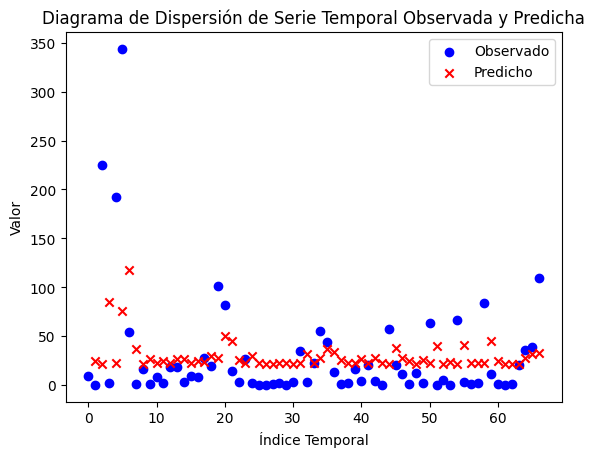

In [519]:
plt.scatter(serie_temporal.index, serie_temporal, label='Observado', color='blue')
plt.scatter(serie_predicha.index, serie_predicha, label='Predicho', color='red', marker='x')

# Configurar el gráfico
plt.title('Diagrama de Dispersión de Serie Temporal Observada y Predicha')
plt.xlabel('Índice Temporal')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [520]:
df_FH3AR1 = pd.DataFrame(serie_predicha)
df_FH3AR1

,0
0,NaN
1,24.490008
2,21.955253
3,84.822764
4,22.448200
...,...
62,21.944050
63,22.056083
64,27.587729
65,31.987839


### Lag 3 Correccion

In [521]:
lags = 3
results = sm.stats.acorr_ljungbox(df_FH3, lags=[lags])
print("Número de lags a evaluar: ", lags)
print("Ljung-Box statistic: ", results['lb_stat'][lags])
print("Ljung-Box p-value: ", results['lb_pvalue'][lags])

Número de lags a evaluar:  3
Ljung-Box statistic:  9.700375543455626
Ljung-Box p-value:  0.021292525013780518


In [522]:

# Supongamos que 'df_FH1' es tu DataFrame y 'columna_tiempo' es la columna de la serie temporal
serie_temporal = df_FH3['Tiempos Entre Arribos Franja Horaria 3 (seg)']

# Ajustar un modelo AR(1)
lags = 3  # Especificar el número de rezagos (lags)
modelo_ar = sm.tsa.AutoReg(serie_temporal, lags=lags).fit()

# Imprimir resumen del modelo
print(modelo_ar.summary())

# Obtener y visualizar los coeficientes del modelo
print("Coeficientes del modelo AR(3):")
print("Intercepto:", modelo_ar.params[0])
print("Coeficiente AR(3):", modelo_ar.params[1])

# Predecir la serie utilizando el modelo
serie_predicha = modelo_ar.predict()

# Imprimir la serie predicha
print("Serie Temporal Predicha:")
serie_predicha

                                         AutoReg Model Results                                          
Dep. Variable:     Tiempos Entre Arribos Franja Horaria 3 (seg)   No. Observations:                   67
Model:                                               AutoReg(3)   Log Likelihood                -338.193
Method:                                         Conditional MLE   S.D. of innovations             47.719
Date:                                          Fri, 01 Mar 2024   AIC                            686.387
Time:                                                  14:05:19   BIC                            697.181
Sample:                                                       3   HQIC                           690.639
                                                             67                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

0           NaN
1           NaN
2           NaN
3     80.453089
4     10.000804
        ...    
62    15.756835
63    13.710031
64    19.343856
65    23.621551
66    28.232369
Length: 67, dtype: float64

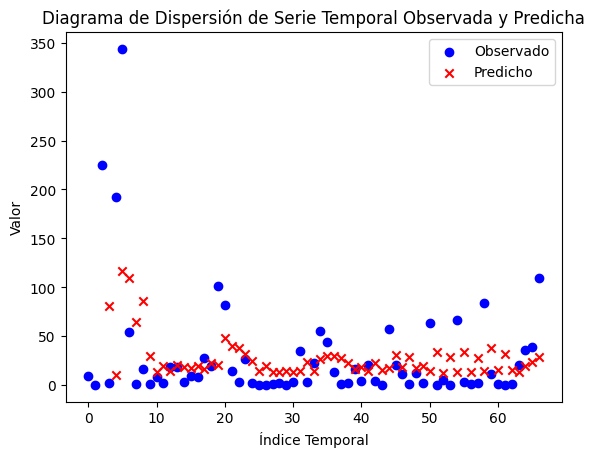

In [523]:
plt.scatter(serie_temporal.index, serie_temporal, label='Observado', color='blue')
plt.scatter(serie_predicha.index, serie_predicha, label='Predicho', color='red', marker='x')

# Configurar el gráfico
plt.title('Diagrama de Dispersión de Serie Temporal Observada y Predicha')
plt.xlabel('Índice Temporal')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [524]:
df_FH3AR3 = pd.DataFrame(serie_predicha)
df_FH3AR3

,0
0,NaN
1,NaN
2,NaN
3,80.453089
4,10.000804
...,...
62,15.756835
63,13.710031
64,19.343856
65,23.621551


# Prueba Bondad de Ajuste

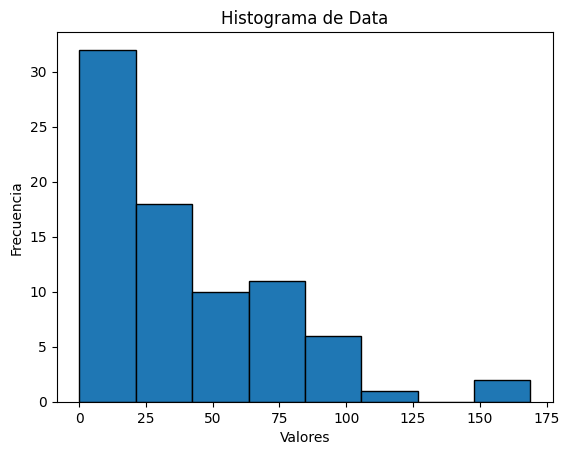

In [525]:
plt.hist(df_grouped['Data'], bins='auto', edgecolor='black')  # 'auto' selecciona automáticamente el número de bins

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Data')

# Mostrar el histograma
plt.show()

In [526]:
series = np.array(df_grouped).flatten()

**Gráficas para una distribución normal**

Parámetro estimado: Media = 39.0615
Parámetro estimado: Desviación Estándar = 35.98597991232141


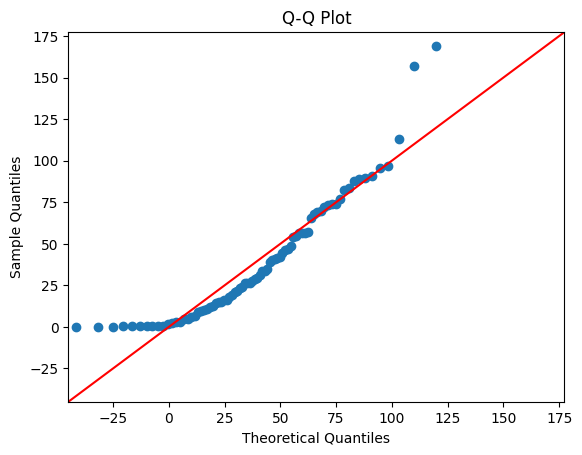

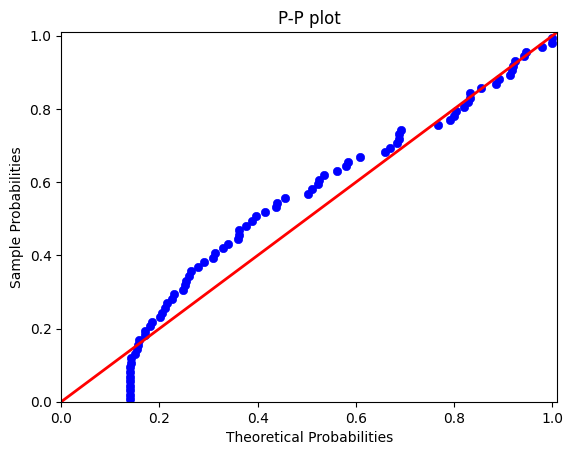

In [527]:
PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")

**Gráficas para una distribución lognormal**

Parámetro estimado (normal asociada): Media = 2.805366200084154
Parámetro estimado (normal asociada): Desviación Estándar = 1.8418708644494624


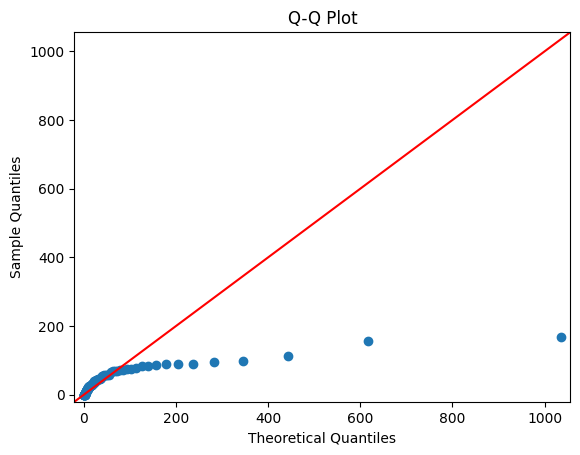

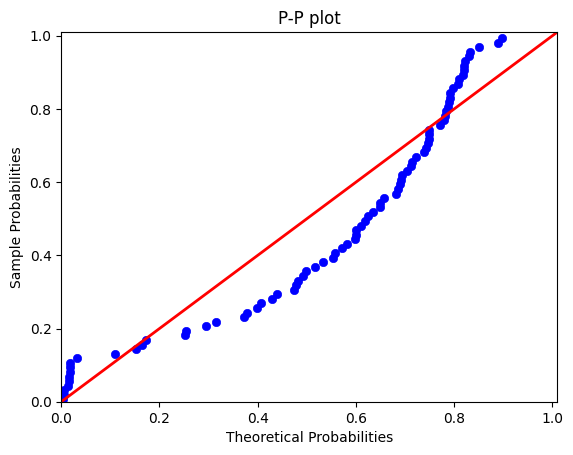

In [528]:
PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")

**Gráficas para una distribución exponencial**

Parámetro estimado: Tasa = 0.025600655376777644


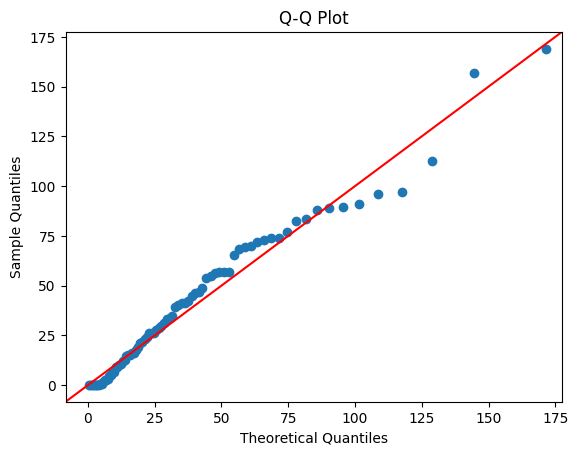

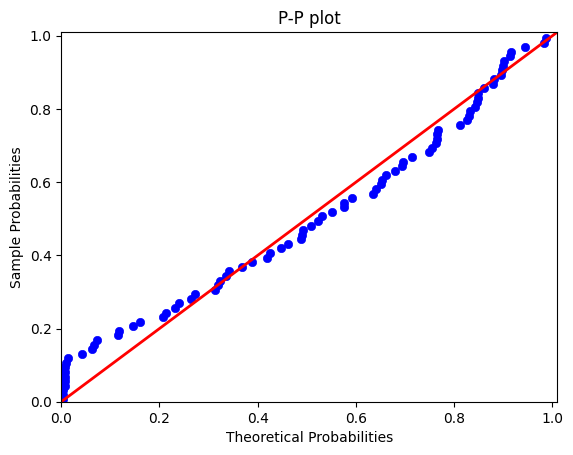

In [529]:
PP_QQ_plot_exponential(series,tasa="estimado")

**Gráficas para una distribución uniforme**

Parámetro estimado: a = 0.13
Parámetro estimado: b = 168.91


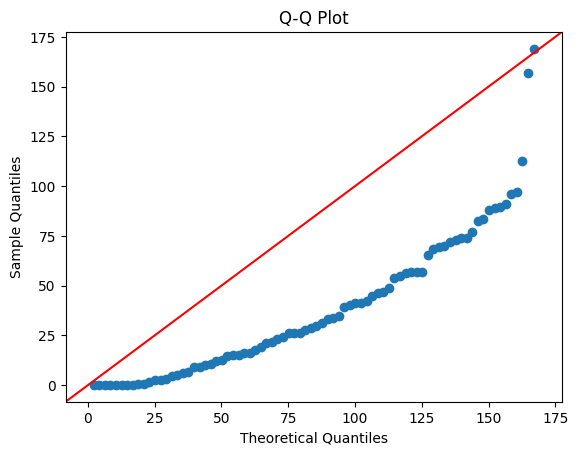

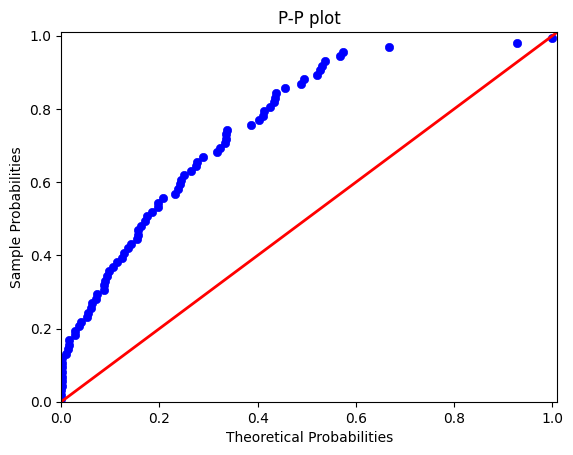

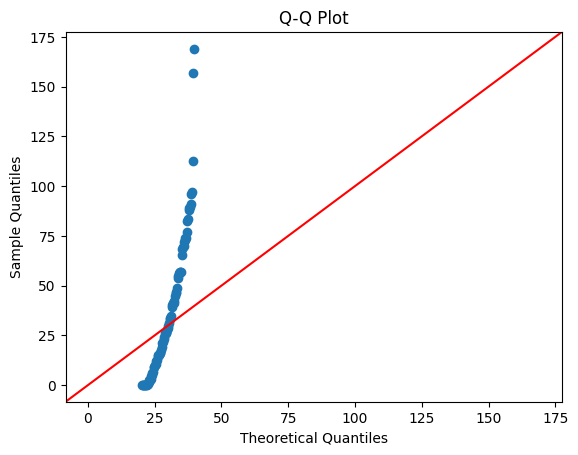

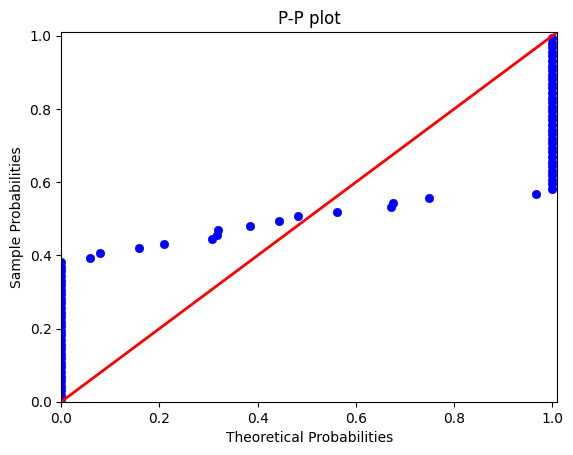

In [530]:
#Con parámetros estimados
PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
#Con parámetros establecidos por el usuario
PP_QQ_plot_uniform(series,minimo=20,maximo=40)

**Gráficas para una distribución triangular**

Parámetro estimado: a = 0.13
Parámetro estimado: b = 168.91
Parámetro estimado: c = 0.33


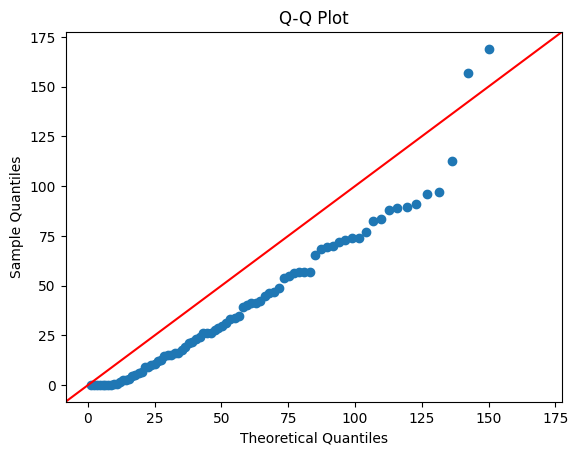

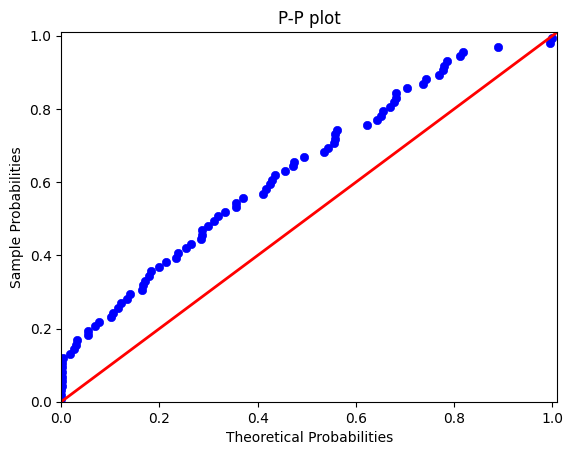

In [531]:
PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")

**Gráficas para una distribución gamma**

Parámetro estimado: Media = 39.0615
Parámetro estimado: Varianza = 1294.99075025


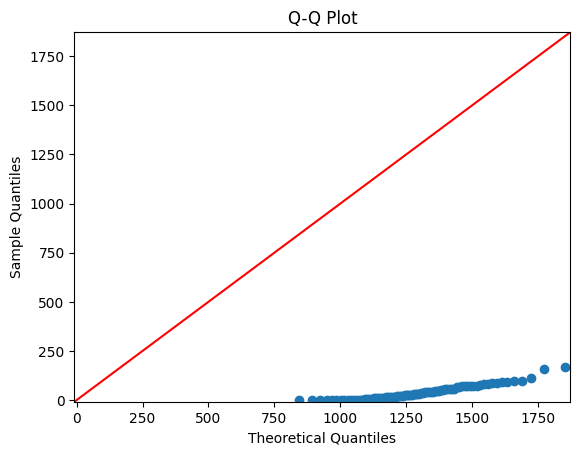

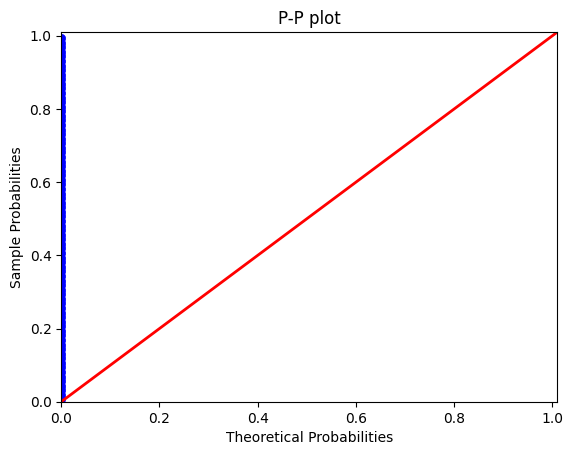

In [532]:
PP_QQ_plot_gamma(series,media="estimado",varianza="estimado")

**Gráficas para una distribución weibull**

Parámetro estimado: Escala = 36.1491513406237
Parámetro estimado: Forma = 0.8326928582008606


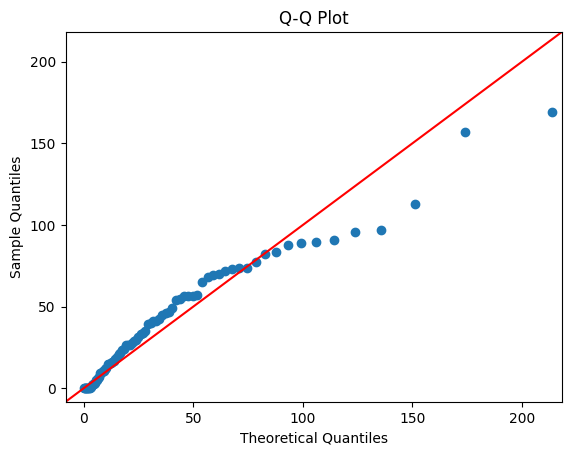

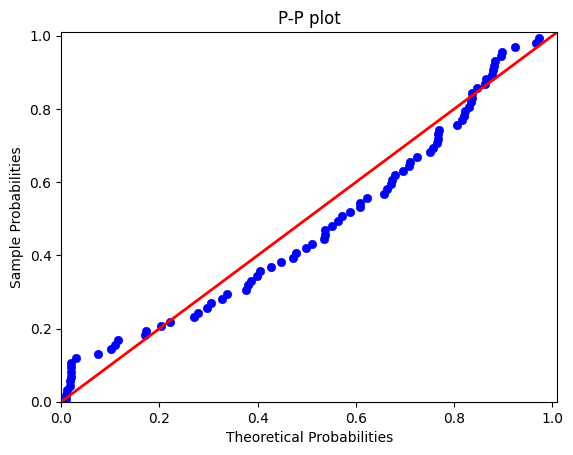

In [533]:
PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")

# Prueba de bondad de ajuste con distr exponencial

In [534]:
data = series
data

array([3.3530e+01, 6.9330e+01, 5.3820e+01, 2.6400e+01, 4.6610e+01,
       5.7090e+01, 6.8230e+01, 1.6891e+02, 8.9130e+01, 9.0760e+01,
       1.4650e+01, 7.7070e+01, 1.7100e+00, 1.0730e+01, 2.4170e+01,
       6.8100e+00, 2.9200e+00, 4.8910e+01, 1.4970e+01, 8.3500e+01,
       2.7200e+00, 1.2440e+01, 1.1930e+01, 4.2250e+01, 2.1560e+01,
       7.3740e+01, 4.1380e+01, 1.7910e+01, 1.9240e+01, 4.8800e+00,
       4.1070e+01, 6.9920e+01, 4.8300e+00, 6.1300e+00, 2.6340e+01,
       1.6380e+01, 3.4960e+01, 6.5250e+01, 3.1240e+01, 5.6670e+01,
       2.6150e+01, 5.6710e+01, 7.3100e+01, 1.5230e+01, 9.6800e+01,
       9.3800e+00, 1.6000e+01, 9.0200e+00, 1.6000e-01, 4.4550e+01,
       8.9750e+01, 3.3000e-01, 1.0300e+01, 7.1970e+01, 2.8850e+01,
       5.4770e+01, 2.3150e+01, 4.0100e+01, 1.5000e-01, 1.5688e+02,
       2.1160e+01, 5.6340e+01, 2.4900e+00, 3.3000e-01, 4.6300e+01,
       3.0000e-01, 1.1277e+02, 7.3800e+01, 3.3440e+01, 8.7980e+01,
       2.9640e+01, 2.7690e+01, 2.7000e-01, 8.2420e+01, 3.2000e

In [535]:
chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

Parámetro estimado: Tasa = 0.025600655376777644
Chi-squared statistic: 19.99999999999999
p-value: 0.13014142088248337


In [536]:
chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)

Parámetro estimado: Escala = 36.1491513406237
Parámetro estimado: Forma = 0.8326928582008606
Chi-squared statistic: 15.667622061476681
p-value: 0.26754486768681907


Se puede ajustar a una distribucion weibull o a una distribucion exponencial